In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, re
import glob
from scipy.optimize import curve_fit
import scipy.optimize
from functions import *

In [2]:
file_path = glob.glob("QT01/measurement 3/michelson*.csv")
file_path.sort()
file_path

['QT01/measurement 3/michelson_errasure_hwp0B90A0.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0D0.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0D15.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0D30.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0D45.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0D60.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0D75.csv',
 'QT01/measurement 3/michelson_errasure_hwp45B90A0D90.csv',
 'QT01/measurement 3/michelson_errasuring_-10.csv']

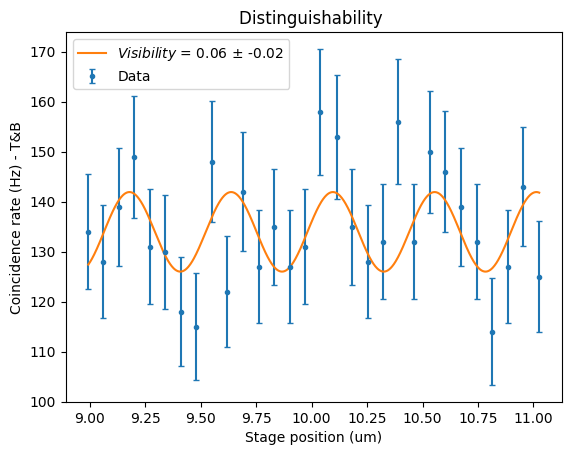

In [3]:
res = get_oscillation_parameters_from_interferogram(file_path[1])
fig, ax = fit_and_plot_interferogram(file_path[1], title='Distinguishability ', label=f"$Visibility$ = {abs(res['visibility']):.2f} $\pm$ {res['sd_visibility']:.2f}")
fig.savefig('interferogram_distinguishability.png', dpi=300)

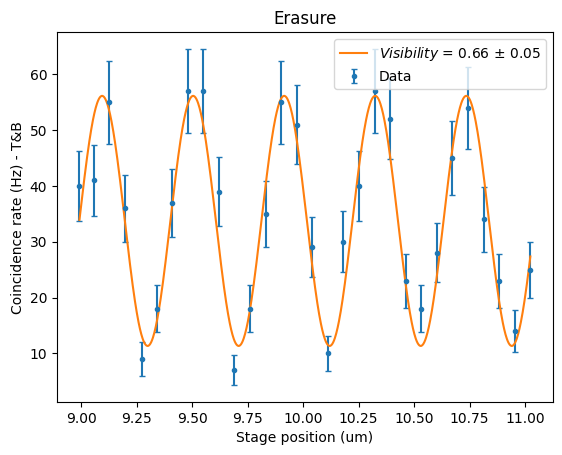

In [4]:
res = get_oscillation_parameters_from_interferogram(file_path[5])
fig, ax = fit_and_plot_interferogram(file_path[5], title='Erasure', label=f"$Visibility$ = {abs(res['visibility']):.2f} $\pm$ {res['sd_visibility']:.2f}")
fig.savefig('interferogram_errasure.png', dpi=300)

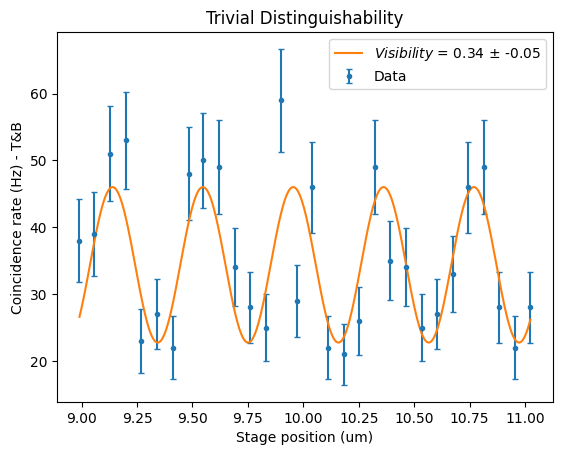

In [5]:
res = get_oscillation_parameters_from_interferogram(file_path[3])
fig, ax = fit_and_plot_interferogram(file_path[3], title='Trivial Distinguishability', label=f"$Visibility$ = {abs(res['visibility']):.2f} $\pm$ {res['sd_visibility']:.2f}")
fig.savefig('interferogram_trivial.png', dpi=300)

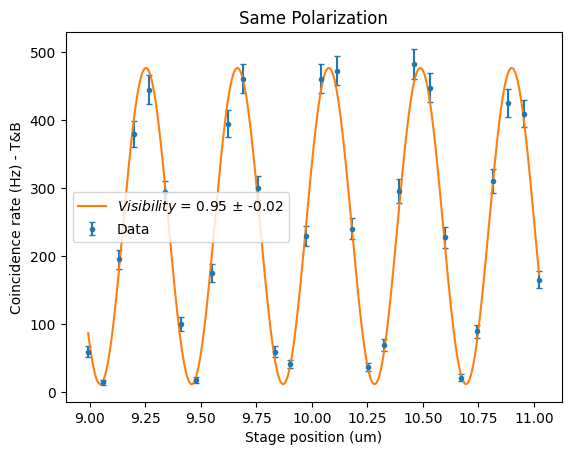

In [6]:
res = get_oscillation_parameters_from_interferogram(file_path[9])
fig, ax = fit_and_plot_interferogram(file_path[9], title='Same Polarization', label=f"$Visibility$ = {abs(res['visibility']):.2f} $\pm$ {res['sd_visibility']:.2f}")
fig.savefig('interferogram_same.png', dpi=300)

In [7]:
m_files = glob.glob("QT01/measurement 3/michelson*D*.csv")
ga_files = glob.glob("QT01/measurement 3/GRA_*A_*D*.csv")
gb_files = glob.glob("QT01/measurement 3/GRA_*B_*D*.csv")

m_files.sort()
ga_files.sort()
gb_files.sort()

CA = []
CB = []
V = []
D = []
M = []

for i in range(len(m_files)):
    res = get_oscillation_parameters_from_interferogram(m_files[i])
    V.append([abs(res['visibility']), abs(res['sd_visibility'])])

    ca, ca_err = get_rate_from_gra(ga_files[i])
    CA.append([ca, ca_err])
    
    cb, cb_err = get_rate_from_gra(gb_files[i])
    CB.append([cb, cb_err])

    d = 2 * (max(ca, cb)/(ca + cb)) - 1
    d_err = 2 * np.sqrt((cb * ca_err)**2 + (ca * cb_err)**2)/ (ca + cb)**2
    D.append([d, d_err])
    
    m = np.sqrt(d**2 + res['visibility']**2)
    m_err = np.sqrt((d * d_err)**2 + (res['visibility'] * res['sd_visibility'])**2) / np.sqrt(d**2 + res['visibility']**2)
    M.append([m, m_err])



In [8]:
M = pd.DataFrame(M, index=None)
D = pd.DataFrame(D, index=None)
V = pd.DataFrame(V, index=None)

In [9]:
V

,0,1
0,0.112931,0.041458
1,0.338267,0.045452
2,0.570289,0.045120
3,0.663919,0.046260
4,0.613240,0.047818
5,0.243117,0.045635
6,0.088696,0.042195


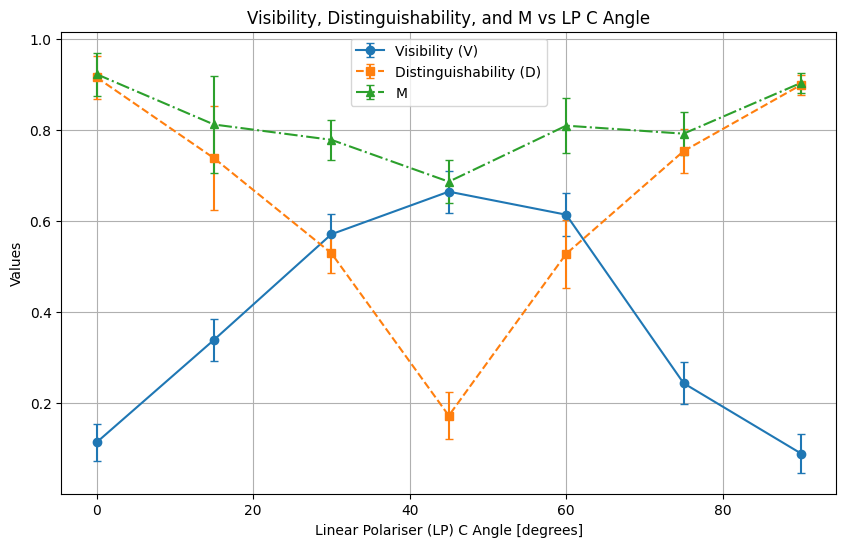

In [11]:
LP_C_angle = np.array([0, 15, 30, 45, 60, 75, 90])
# Visibility = np.array([0.25748503, 0.414634146, 0.625, 0.806451613, 0.714285714, 0.466666667, 0.323943662])
# Distinguishability = np.array([0.915054034, 0.737499383, 0.528795812, 0.171830986, 0.527342677, 0.75308642, 0.898477157])
# M = np.array([0.950590567, 0.846065491, 0.818687981, 0.824554481, 0.887859437, 0.885955379, 0.955091984])


plt.figure(figsize=(10, 6))

plt.errorbar(LP_C_angle, V[0], yerr=V[1], marker='o', capsize=3, linestyle='-', label='Visibility (V)')
plt.errorbar(LP_C_angle, D[0], yerr=D[1], marker='s', capsize=3, linestyle='--', label='Distinguishability (D)')
plt.errorbar(LP_C_angle, M[0], yerr=M[1], marker='^', capsize=3, linestyle='-.', label='M')

plt.xlabel("Linear Polariser (LP) C Angle [degrees]")
plt.ylabel("Values")
plt.title("Visibility, Distinguishability, and M vs LP C Angle")
plt.legend()
plt.grid(True)
plt.savefig('VDM.png', dpi=300)
# Show the plot
plt.show()


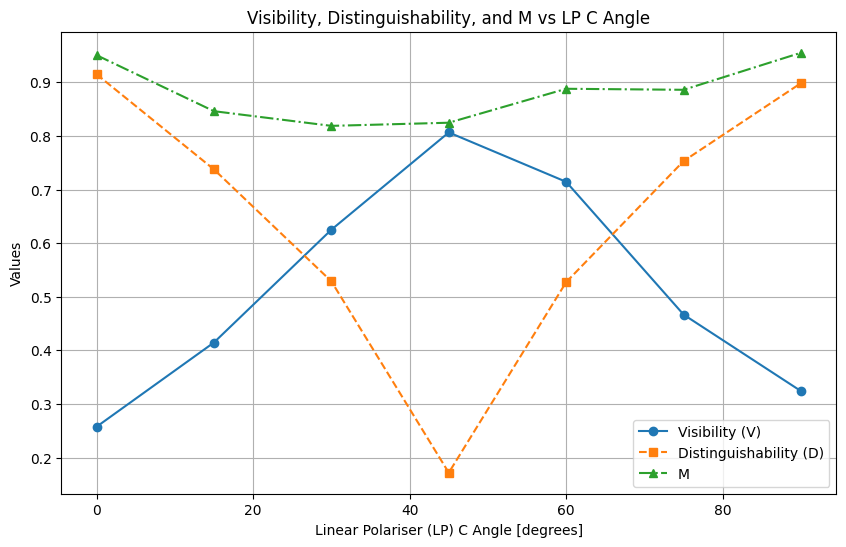

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
LP_C_angle = np.array([0, 15, 30, 45, 60, 75, 90])  # LP C angle values
Visibility = np.array([0.25748503, 0.414634146, 0.625, 0.806451613, 0.714285714, 0.466666667, 0.323943662])
Distinguishability = np.array([0.915054034, 0.737499383, 0.528795812, 0.171830986, 0.527342677, 0.75308642, 0.898477157])
M = np.array([0.950590567, 0.846065491, 0.818687981, 0.824554481, 0.887859437, 0.885955379, 0.955091984])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each variable
plt.plot(LP_C_angle, Visibility, marker='o', linestyle='-', label='Visibility (V)')
plt.plot(LP_C_angle, Distinguishability, marker='s', linestyle='--', label='Distinguishability (D)')
plt.plot(LP_C_angle, M, marker='^', linestyle='-.', label='M')

# Add labels and title
plt.xlabel("Linear Polariser (LP) C Angle [degrees]")
plt.ylabel("Values")
plt.title("Visibility, Distinguishability, and M vs LP C Angle")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
